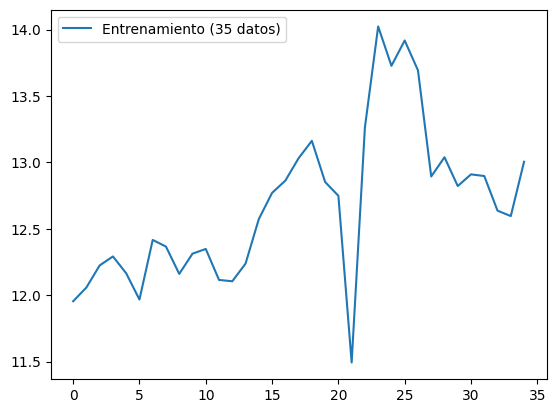

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.3114
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2879
Epoch 3/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2720
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2592
Epoch 5/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2482
Epoch 6/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2385
Epoch 7/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2296
Epoch 8/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2214
Epoch 9/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2137
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.2064
Epoch 11/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1995
Epoch 12/20
1/1 [==============================] - 0s 5ms/step - loss: 0.1929
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - loss: 0.1

In [16]:
#https://github.com/codificandobits/Prediccion_de_acciones_en_la_bolsa_con_redes_LSTM
import numpy as np
np.random.seed(4) #Always the same random values (stored in position 4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

#
# Lectura de los datos
#
dataset = pd.read_csv('dataset_14_08_2002.csv')
dataset.head()

set_entrenamiento = dataset[:].iloc[:,1:2]

set_entrenamiento['GB'].plot(legend=True)
plt.legend(['Entrenamiento (35 datos)'])
plt.show()

# Normalización del set de entrenamiento
sc = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc.fit_transform(set_entrenamiento)

# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step = 5
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Red LSTM
dim_entrada = (X_train.shape[1],1)
dim_salida = 1
na = 10

modelo = Sequential()
modelo.add(LSTM(units=na, input_shape=dim_entrada))
modelo.add(Dense(units=dim_salida))
modelo.compile(optimizer='rmsprop', loss='mse')
modelo.fit(X_train,Y_train,epochs=20,batch_size=32)

#Validation (prediction)
time_step = 5
X_test = []
Y_test = []
m = len(set_entrenamiento_escalado)

for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_test.append(set_entrenamiento_escalado[i-time_step:i,0])

    # Y: el siguiente dato
    Y_test.append(set_entrenamiento_escalado[i,0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test)

prediccion = modelo.predict(X_test)
prediccion = sc.inverse_transform(prediccion)

# print(prediccion)

# Si quieres por ejemplo hacer una sola prediccion puedes hacerlo de la siguiente forma.

cinco_pasos = np.array([[[1.0], [2.0], [3.0], [4.0], [5.0]]])
prediccion = modelo.predict(cinco_pasos)
prediccion = sc.inverse_transform(prediccion)

print("La prediccion del siguiente paso dados los cinco previos pasos {} es:".format(cinco_pasos), prediccion)

